<a href="https://colab.research.google.com/github/khadijaatiq/ML-Algos/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- RAW DATA HEAD ---
         Income  Spending_Score       Savings Risk_Profile
0  57450.712295       67.155747  20497.282456         High
1  47926.035482       71.215691  17537.803375          Low
2  59715.328072       81.661025  26517.664245       Medium
3  72845.447846       81.076041  25631.965045         High
4  46487.699379       32.446613  20107.782890         High

--- 1. Structure & Stats ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          200 non-null    float64
 1   Spending_Score  200 non-null    float64
 2   Savings         200 non-null    float64
 3   Risk_Profile    200 non-null    object 
dtypes: float64(3), object(1)
memory usage: 6.4+ KB
None
             Income  Spending_Score       Savings
count    200.000000      200.000000    200.000000
mean   49388.435522       61.717364  19639.044745
std    13965.

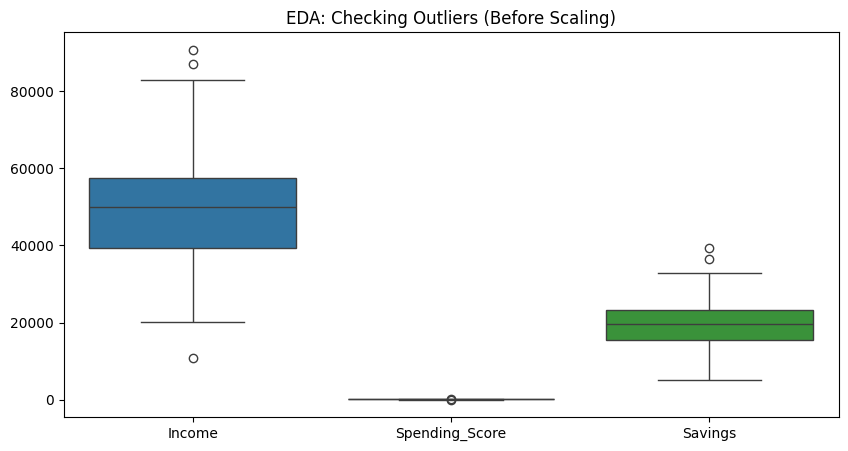

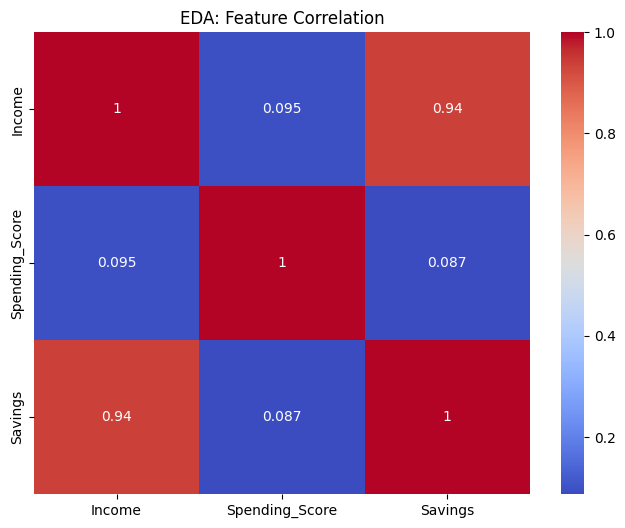


--- Data After Encoding ---
         Income  Spending_Score       Savings  Risk_Profile_Encoded
0  57450.712295       67.155747  20497.282456                     0
1  47926.035482       71.215691  17537.803375                     1
2  59715.328072       81.661025  26517.664245                     2
3  72845.447846       81.076041  25631.965045                     0
4  46487.699379       32.446613  20107.782890                     0

--- PCA Explained Variance ---
Variance per PC: [0.48902367 0.26658844 0.22920674 0.01518114]
Cumulative Variance: [0.48902367 0.75561212 0.98481886 1.        ]


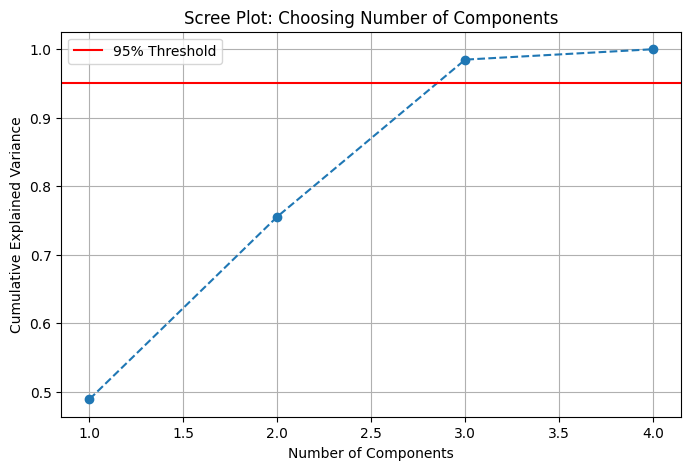


--- Final Reduced Data (First 5 Rows) ---
        PC1       PC2
0  0.553254 -0.986431
1 -0.254960 -0.292372
2  1.447221  0.434027
3  2.022478 -1.321631
4 -0.280472  0.124281


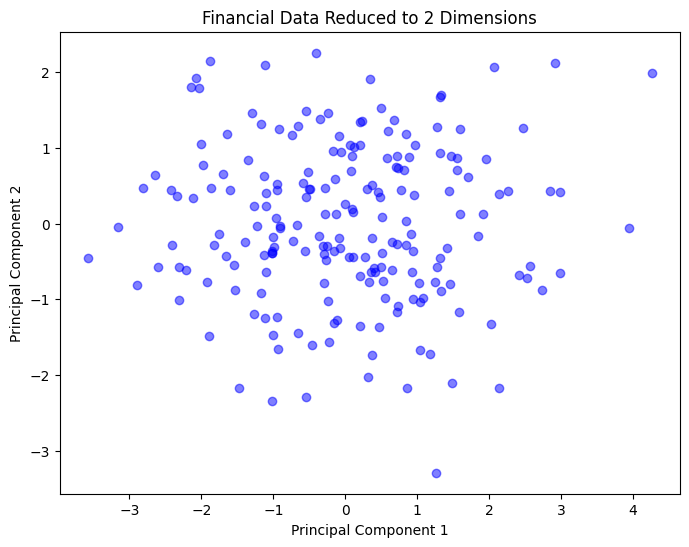

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# ==========================================
# 1. CREATE MOCK DATASET (Simulating Task 3)
# ==========================================
# We create data with Income, Spending, Savings, and a categorical 'Risk_Profile'
np.random.seed(42)
data = {
    'Income': np.random.normal(50000, 15000, 200),
    'Spending_Score': np.random.normal(60, 20, 200),
    'Savings': np.random.normal(20000, 5000, 200),
    'Risk_Profile': np.random.choice(['Low', 'Medium', 'High'], 200) # Categorical!
}
df = pd.DataFrame(data)

# Introduce some correlation (Income usually correlates with Savings)
df['Savings'] = df['Income'] * 0.4 + np.random.normal(0, 2000, 200)

print("--- RAW DATA HEAD ---")
print(df.head())

# ==========================================
# 2. EXPLORATORY DATA ANALYSIS (EDA)
# ==========================================
print("\n--- 1. Structure & Stats ---")
print(df.info())
print(df.describe())

# VISUALIZATION 1: Check for Outliers (Performance Killer)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.select_dtypes(include=np.number)) # Only boxplot numeric cols
plt.title("EDA: Checking Outliers (Before Scaling)")
plt.show()

# VISUALIZATION 2: Correlation Matrix (The "Why PCA?" Check)
# PCA is only useful if features are correlated.
plt.figure(figsize=(8, 6))
# We only check correlation on numeric columns for now
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("EDA: Feature Correlation")
plt.show()

# ==========================================
# 3. PREPROCESSING (Encoding & Scaling)
# ==========================================

# A. ENCODING (Handling the Categorical 'Risk_Profile')
# Machine Learning models cannot understand "Low/Medium/High".
# We use Label Encoding here (0, 1, 2) since risk has an order.
# If it was 'City' (Nominal), we might use pd.get_dummies() instead.
le = LabelEncoder()
df['Risk_Profile_Encoded'] = le.fit_transform(df['Risk_Profile'])

# Drop the original text column so dataset is fully numeric
df_numeric = df.drop(['Risk_Profile'], axis=1)

print("\n--- Data After Encoding ---")
print(df_numeric.head())

# B. STANDARDIZATION (Crucial Step)
# PCA is sensitive to scale. Income (50,000) would dominate Spending (60).
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# ==========================================
# 4. APPLYING PCA (Sklearn Implementation)
# ==========================================

# Step 1: Initialize PCA
# We don't know how many components we need yet, so let's keep all 4 temporarily
pca = PCA(n_components=None)

# Step 2: Fit
pca.fit(df_scaled)

# Step 3: Determine 'k' (Number of components to keep)
# We look at Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("\n--- PCA Explained Variance ---")
print("Variance per PC:", explained_variance)
print("Cumulative Variance:", cumulative_variance)

# Step 4: Scree Plot (The Elbow Method for PCA)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Threshold')
plt.title('Scree Plot: Choosing Number of Components')
plt.legend()
plt.grid()
plt.show()

# ==========================================
# 5. FINAL TRANSFORMATION
# ==========================================
# Based on the plot, let's say 2 components explain enough variance (e.g. >90%)
pca_final = PCA(n_components=2)
df_pca = pca_final.fit_transform(df_scaled)

# Create a DataFrame for the result
pca_df = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])

print("\n--- Final Reduced Data (First 5 Rows) ---")
print(pca_df.head())

# VISUALIZATION: The Reduced 2D Data
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Financial Data Reduced to 2 Dimensions')
plt.show()